In [1]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import os 
import plotly.express as px

In [8]:
# 10: 257
# 15: 3369
# 18: 215
# 22: 106
# 27: 94
# 3: 370
# 33: 147
# 4: 5392
# 9: 5
## 9 =>10 : 262
lstCC =  [3, 4, 10, 15, 18, 22, 27, 33]
lstPtos = [370, 5392, 262, 3369, 215, 106, 94, 147]

dictClass = {
    '3':"<b> FORMAÇÃO FLORESTAL</b>",
    '4': "<b> FORMAÇÃO SAVÂNICA</b>",        
    '10': "<b> FORMAÇÃO NATURAL NÂO FLORESTAL</b>",
    '15': "<b> PASTAGEM</b>",
    '18': "<b> AGRICULTURA</b>",
    '22': "<b> OUTRA ÁREA NÃO VEGETADA</b>",
    '33': "<b> RIO, LAGO E OCEANO</b>",
    '27': "<b> NÃO OBSERVADO</b>"
}

dict_CColor = {
    "<b> FORMAÇÃO FLORESTAL</b>" : "#1f8d49",
    "<b> FORMAÇÃO SAVÂNICA</b>": "#7dc975",        
    "<b> FORMAÇÃO NATURAL NÂO FLORESTAL</b>": "#ad975a",
    "<b> PASTAGEM</b>": "#edde8e",
    "<b> AGRICULTURA</b>": "#E974ED",
    "<b> OUTRA ÁREA NÃO VEGETADA</b>": "#d4271e",
    "<b> RIO, LAGO E OCEANO</b>": "#0000FF",
    "<b> NÃO OBSERVADO</b>": "#ffffff"
}
dictCCP = {
    'classes': lstCC,
    'numero Ptos': lstPtos
}


In [16]:
df = pd.DataFrame.from_dict(dictCCP)
df['classes'] = df['classes'].astype(str)
df['name_class'] = df['classes']
df['name_class'].replace(dictClass, inplace=True)
df.head()

,classes,numero Ptos,name_class
0,3,370,<b> FORMAÇÃO FLORESTAL</b>
1,4,5392,<b> FORMAÇÃO SAVÂNICA</b>
2,10,262,<b> FORMAÇÃO NATURAL NÂO FLORESTAL</b>
3,15,3369,<b> PASTAGEM</b>
4,18,215,<b> AGRICULTURA</b>


In [22]:
def plot_pie_areasEstaveis(df_tmp, titlePlot, nameLegend):
    fig = px.pie(
        df_tmp, 
        values='numero Ptos', 
        names='name_class',
        hover_data=['name_class'],
        hole= 0.6,
        color='name_class',
        color_discrete_map= dict_CColor
    )
    fig.update_traces(
        textposition='outside', # "inside"
        #textposition='inside',
        textinfo='label + percent',
        textfont_size= 16,
        marker=dict(line=dict(color='#000000', width=0.5))
    )
    fig.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         automargin=True, 
        #         yref='paper'),
        width = 900,
        height = 650,
        showlegend= False,
        # legend_title=nameLegend,
        # legend_title_font_size=15
    )
    fig.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    fig.write_image("imagePPT/" + titlePlot + '.png')

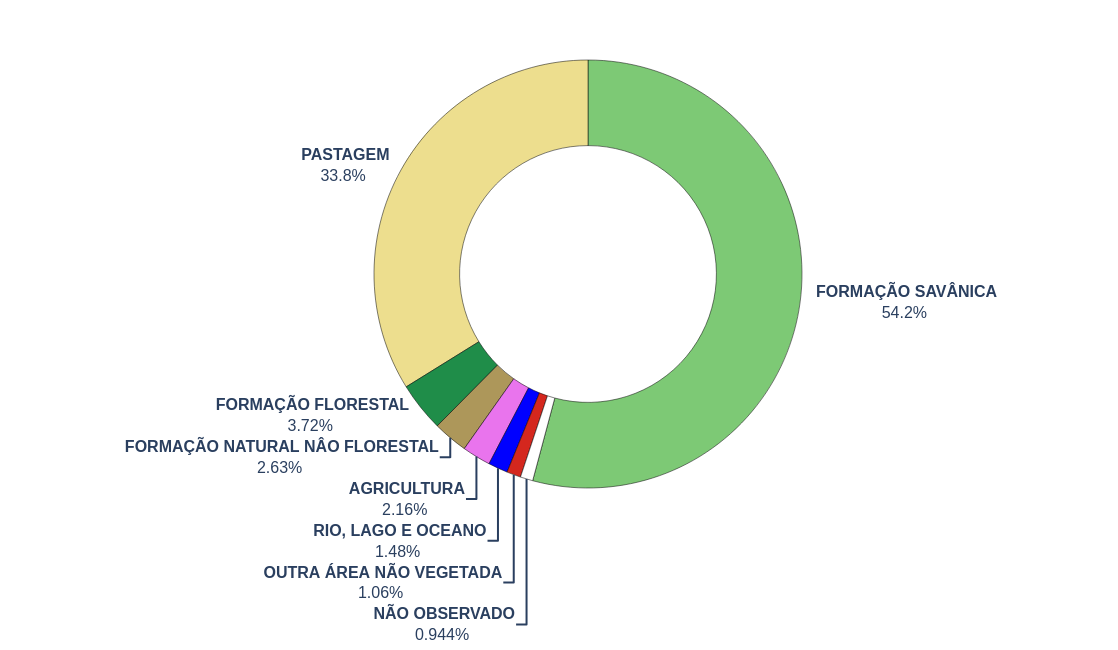

save as  Pontos_de_Acurácia_por_Ano


In [23]:
plot_pie_areasEstaveis(df, "Pontos de Acurácia por Ano", "Legenda MapBiomas")